train_set : 82,484
- CNV : 36,955
- DME : 11,098
- DRUSEN : 8,366
- NORMAL : 26,065

validation_set : 1000(각 250)

test_set : 1000(각 250)

## 모델

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Add
import matplotlib.pyplot as plt
import time


def pre_func(x):
    return x-128.0

# load dataset
train_datagen = ImageDataGenerator(rescale=1./128, preprocessing_function = pre_func)
train_generator = train_datagen.flow_from_directory(
        'D:/OCT-Image/make_dataset/train', # train_image_path
        target_size=(299, 299), # image_size
        batch_size=128, # train_img / batch_size = 1 epoch
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        'D:/OCT-Image/make_dataset/val', # val_image_path
        target_size=(299, 299), # image_size
        batch_size=128, # val_img / batch_size = 1 epoch
        class_mode='categorical')

Found 75484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [22]:
print(train_generator[0][0])

[[[[ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   ...
   [-0.7578125 -0.7578125 -0.7578125]
   [-0.8828125 -0.8828125 -0.8828125]
   [ 0.9921875  0.9921875  0.9921875]]

  [[ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   ...
   [-0.9140625 -0.9140625 -0.9140625]
   [-0.9296875 -0.9296875 -0.9296875]
   [ 0.984375   0.984375   0.984375 ]]

  [[ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   [ 0.9921875  0.9921875  0.9921875]
   ...
   [-0.9296875 -0.9296875 -0.9296875]
   [-0.9375    -0.9375    -0.9375   ]
   [ 0.9609375  0.9609375  0.9609375]]

  ...

  [[-0.890625  -0.890625  -0.890625 ]
   [-0.8984375 -0.8984375 -0.8984375]
   [-0.96875   -0.96875   -0.96875  ]
   ...
   [-0.9765625 -0.9765625 -0.9765625]
   [-0.984375  -0.984375  -0.984375 ]
   [ 0.9453125  0.9453125  0.9453125]]

  [[-0.8984375 -0.8984375 -0.8984375]
   [-0.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Add
import matplotlib.pyplot as plt
import time


# load dataset
train_datagen = ImageDataGenerator(rescale=1./128)
train_generator = train_datagen.flow_from_directory(
        'D:/OCT-Image/make_dataset/train', # train_image_path
        target_size=(299, 299), # image_size
        batch_size=128, # train_img / batch_size = 1 epoch
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        'D:/OCT-Image/make_dataset/val', # val_image_path
        target_size=(299, 299), # image_size
        batch_size=128, # val_img / batch_size = 1 epoch
        class_mode='categorical')


# model 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(299,299,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
print(model.summary())

# model 학습과정설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


print("start train")
start = time.time() # 현재시간 측정
history = model.fit_generator(train_generator,
                    epochs=100,
                    validation_data=val_generator)

print("time :", (time.time() - start) / 60) # 학습하는데 걸리는 시간(현재시간 - 아까 측정한 시간)
model.save('Model_1.h5') # 모델 저장시키기

Found 75484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 64)        0         
___________________________________

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at C:\Users\user\Anaconda3\envs\aaa\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_1403]

Function call stack:
keras_scratch_graph


## Accuracy, Loss 그래프

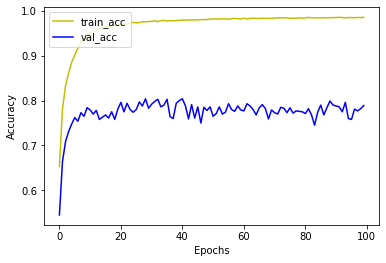

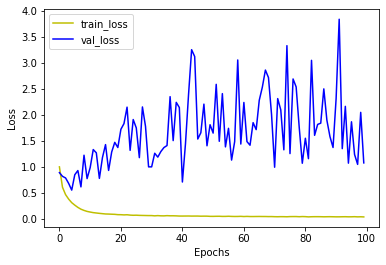

In [27]:
# acc 그래프
plt.figure("train_graph")
plt.plot(history.history['acc'], 'y', label='train_acc')
plt.plot(history.history['val_acc'], 'b', label='val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# val 그래프
plt.figure("val_graph")
plt.plot(history.history['loss'], 'y', label='train_loss')
plt.plot(history.history['val_loss'],'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

## 각 이미지에 대한 모델의 정확도 확인

In [26]:
import numpy as np
from PIL import Image
import glob

test_path = "D:/OCT-Image/make_dataset/test/"
categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

image_w = 299
image_h = 299

for idx, categorie in enumerate(categories):
    result_list = []
    files = glob.glob(test_path + categorie + "/*")
    
    for idx2, file in enumerate(files):
        img = Image.open(file)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        data = data.reshape((1,image_w,image_h,3))
        result = model.predict_classes(data)
        
        if categorie == 'CNV'and result[0] == 0:
            result_list.append(1)
        elif categorie == 'DME' and result[0] == 1:
            result_list.append(1)
        elif categorie == 'DRUSEN' and result[0] == 2:
            result_list.append(1)
        elif categorie == 'NORMAL' and result[0] == 3:
            result_list.append(1)
        else:
            result_list.append(0)
    print(categorie + " 결과 리스트") 
    print(result_list)
    print(categorie + "의 test정확도 : " + str(np.mean(result_list)))

CNV 결과 리스트
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
CNV의 test정확도 : 0.984
DME 결과 리스트
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0